In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
money = pd.read_csv('money_sports_clean.csv', index_col=0)
sports = pd.read_csv('abilities_sports_clean.csv',index_col=0)

In [3]:
money.head()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings_million
0,1,Mike Tyson,USA,1,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,Auto Racing,1990,10.0
4,5,Alain Prost,France,5,Auto Racing,1990,9.0


In [4]:
sports.head()

,Sport,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude,Total,Rank
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,72.375,1
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50,71.750,2
2,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13,68.375,3
3,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,67.875,4
4,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38,63.500,5


First let's take an overall view of the total (the sum of all aptitudes) for all sports

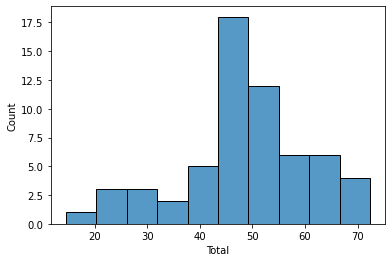

In [168]:
sns.histplot(data=sports, x=sports.Total);

In [167]:
figa = go.Figure([go.Bar(x=sports.Sport, y=sports.Total)])
figa.update_layout(
    autosize=False,
    width=1100,
    height=800
)
figa.show()

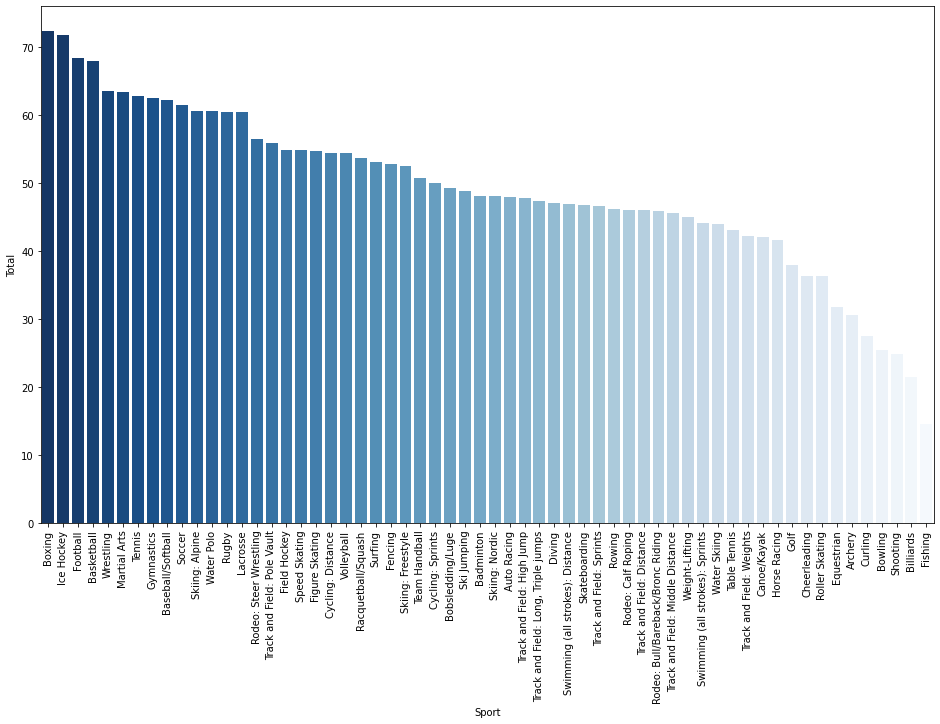

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9.5)
sns.barplot(data=sports, x=sports.Sport, y=sports.Total, palette='Blues_r')
plt.xticks(rotation=90)
plt.show()

In [7]:
# do we really care about all this sports? 
# yes due to the model we are going to develop later on, but for the classification not really, why?
# becasue we will match the sports in the two dataframes, so we might as well make a copy of this dataframe with only the 
# sports relevant, the ones that appear on the other dataframe as well.

In [8]:
# so which are the sports present on the ohter dataframe?

We can do serveral groupbys within the money dataframe to see a lot of individual things such as:
- How a certain sport has evolved in the last 30 years
- How much money has a singular sport made each year
- Which has been the most prevalent sports in the last 30 years in general and on each year
- The money made by each sport in the last 30 years


In [129]:
agrupado = money.groupby(['Sport'],as_index=False).agg({'earnings_million' : 'sum'})

In [130]:
agrupado.head()

,Sport,earnings_million
0,American Football,938.7
1,Auto Racing,1031.3
2,Baseball,168.6
3,Basketball,3433.3
4,Boxing,2298.8


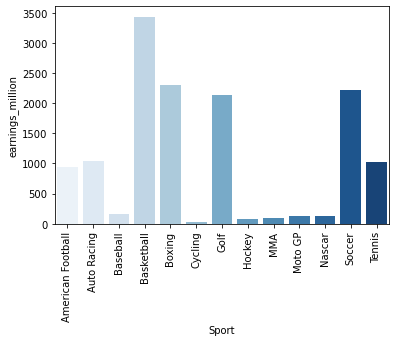

In [132]:
sns.barplot(data=agrupado, x=agrupado.Sport, y=agrupado.earnings_million, palette='Blues')
plt.xticks(rotation=90)
plt.show()

In [143]:
figu = go.Figure([go.Bar(x=agrupado.Sport, y=agrupado.earnings_million)])
figu.show()

In [83]:
agrupado1 = money.groupby(['Year'],as_index=False).agg({'earnings_million' : 'mean'})

In [85]:
agrupado1.head()

,Year,earnings_million
0,1990,12.80
1,1991,18.35
2,1992,15.87
3,1993,17.83
4,1994,14.89


In [95]:
agrupado2 = money.groupby(['Year', 'Sport'], as_index=False).agg({'earnings_million': 'mean'})

In [102]:
agrupado3 = money.groupby(['Sport', 'Year']).mean()

In [106]:
agrupado3.reset_index(inplace = True)

In [107]:
agrupado3.head()

,Sport,Year,S.NO,Current Rank,earnings_million
0,American Football,1992,27.0,7.0,9.5
1,American Football,1993,40.0,10.0,11.5
2,American Football,1996,65.0,5.0,16.5
3,American Football,2004,134.0,3.0,42.0
4,American Football,2005,145.0,4.0,37.5


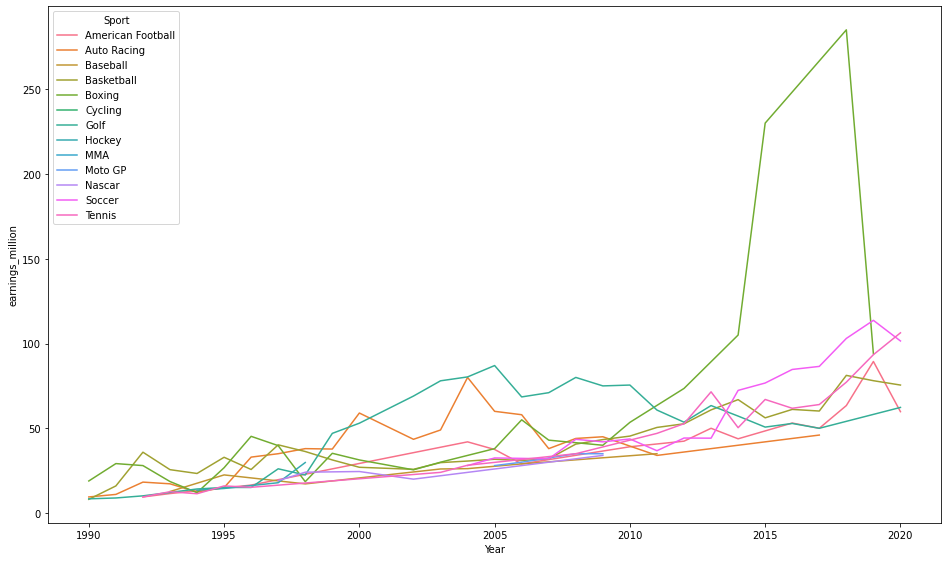

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9.5)
sns.lineplot(data=agrupado3, x=agrupado3.Year, y=agrupado3.earnings_million, hue=agrupado3.Sport)
plt.show()

In [128]:
CHART_THEME = 'plotly_white'
chart_sport_year = go.Figure()
chart_sport_year.add_trace(go.Scatter( x=agrupado3['Year'], y=agrupado3['earnings_million'],
                                     mode = 'lines',
                                     name = agrupado3['Sport']))
chart_sport_year.layout.template = CHART_THEME
chart_sport_year.layout.height=500
chart_sport_year.update_layout(margin = dict(t=50, b=50, l=25, r=25))

chart_sport_year.show()

ValueError: 
    Invalid value of type 'pandas.core.series.Series' received for the 'name' property of scatter
        Received value: 0      American Football
1      American Football
2      American Football
3      American Football
4      American Football
             ...        
168               Tennis
169               Tennis
170               Tennis
171               Tennis
172               Tennis
Name: Sport, Length: 173, dtype: object

    The 'name' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string